In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the rquests library
import requests

# Import the API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latutude and londitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

589

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginnning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into the city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | north bend
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | smithville
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | gillette
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | srednekolymsk
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | auki
Processing Record 22 of Set 1 | amga
Processing Record 23 of Set 1

Processing Record 45 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | quatre cocos
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | morondava
Processing Record 50 of Set 4 | yar-sale
Processing Record 1 of Set 5 | harnosand
Processing Record 2 of Set 5 | curup
Processing Record 3 of Set 5 | sheridan
Processing Record 4 of Set 5 | te anau
Processing Record 5 of Set 5 | garowe
Processing Record 6 of Set 5 | welkom
Processing Record 7 of Set 5 | luoyang
Processing Record 8 of Set 5 | najran
Processing Record 9 of Set 5 | maningrida
Processing Record 10 of Set 5 | general pico
Processing Record 11 of Set 5 | san juan
Processing Record 12 of Set 5 | aranda de duero
Processing Record 13 of Set 5 | saldanha
Processing Record 14 of Set 5 | oktyabrskoye
Processing Record 15 of Set 5 | comodoro rivadavia
Processing Record 16 of Set 5 | hovd
Processing Record 17 of Set 5 | mys shmidta
City not found

Processing Record 30 of Set 8 | kieta
Processing Record 31 of Set 8 | manoel urbano
Processing Record 32 of Set 8 | torata
Processing Record 33 of Set 8 | kungurtug
Processing Record 34 of Set 8 | pontianak
Processing Record 35 of Set 8 | kuche
City not found. Skipping...
Processing Record 36 of Set 8 | korla
Processing Record 37 of Set 8 | rosetta
Processing Record 38 of Set 8 | pangkalanbuun
Processing Record 39 of Set 8 | werda
Processing Record 40 of Set 8 | berlevag
Processing Record 41 of Set 8 | novovarshavka
Processing Record 42 of Set 8 | mayo
Processing Record 43 of Set 8 | asilah
Processing Record 44 of Set 8 | uvat
Processing Record 45 of Set 8 | meulaboh
Processing Record 46 of Set 8 | muzhi
Processing Record 47 of Set 8 | sumbe
Processing Record 48 of Set 8 | bonavista
Processing Record 49 of Set 8 | malindi
Processing Record 50 of Set 8 | prince rupert
Processing Record 1 of Set 9 | rio grande
Processing Record 2 of Set 9 | saint-pierre
Processing Record 3 of Set 9 | uru

Processing Record 19 of Set 12 | bababe
City not found. Skipping...
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 22 of Set 12 | challans
Processing Record 23 of Set 12 | urubicha
Processing Record 24 of Set 12 | fairbanks
Processing Record 25 of Set 12 | khandyga
Processing Record 26 of Set 12 | mehamn
Processing Record 27 of Set 12 | caravelas
Processing Record 28 of Set 12 | voh
Processing Record 29 of Set 12 | ajuchitlan
Processing Record 30 of Set 12 | tautira
Processing Record 31 of Set 12 | giyon
Processing Record 32 of Set 12 | majene
Processing Record 33 of Set 12 | yambio
Processing Record 34 of Set 12 | dumai
Processing Record 35 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 36 of Set 12 | brylivka
Processing Record 37 of Set 12 | soe
Processing Record 38 of Set 12 | magaria
Processing Record 39 of Set 12 | shelby
---------------------------
Data Retrieval Complete 

In [7]:
num_cities = len(city_data)
num_cities

542

In [8]:
# Convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,North Bend,43.4065,-124.2243,56.91,84,100,9.22,US,2022-04-26 20:29:21
1,Cidreira,-30.1811,-50.2056,72.28,86,11,10.56,BR,2022-04-26 20:28:35
2,Hermanus,-34.4187,19.2345,57.87,76,0,8.48,ZA,2022-04-26 20:29:22
3,Barrow,71.2906,-156.7887,8.62,85,100,13.80,US,2022-04-26 20:29:22
4,Kapaa,22.0752,-159.3190,78.78,88,100,14.97,US,2022-04-26 20:29:23
5,Aykhal,66.0000,111.5000,8.96,99,72,4.05,RU,2022-04-26 20:29:24
6,East London,-33.0153,27.9116,61.97,79,3,12.97,ZA,2022-04-26 20:26:10
7,Mataura,-46.1927,168.8643,50.49,99,89,1.99,NZ,2022-04-26 20:29:25
8,Fortuna,40.5982,-124.1573,59.94,61,0,16.11,US,2022-04-26 20:26:21
9,Ponta Do Sol,32.6667,-17.1000,63.72,73,35,4.59,PT,2022-04-26 20:29:26


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,North Bend,US,2022-04-26 20:29:21,43.4065,-124.2243,56.91,84,100,9.22
1,Cidreira,BR,2022-04-26 20:28:35,-30.1811,-50.2056,72.28,86,11,10.56
2,Hermanus,ZA,2022-04-26 20:29:22,-34.4187,19.2345,57.87,76,0,8.48
3,Barrow,US,2022-04-26 20:29:22,71.2906,-156.7887,8.62,85,100,13.80
4,Kapaa,US,2022-04-26 20:29:23,22.0752,-159.3190,78.78,88,100,14.97
5,Aykhal,RU,2022-04-26 20:29:24,66.0000,111.5000,8.96,99,72,4.05
6,East London,ZA,2022-04-26 20:26:10,-33.0153,27.9116,61.97,79,3,12.97
7,Mataura,NZ,2022-04-26 20:29:25,-46.1927,168.8643,50.49,99,89,1.99
8,Fortuna,US,2022-04-26 20:26:21,40.5982,-124.1573,59.94,61,0,16.11
9,Ponta Do Sol,PT,2022-04-26 20:29:26,32.6667,-17.1000,63.72,73,35,4.59


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the dataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

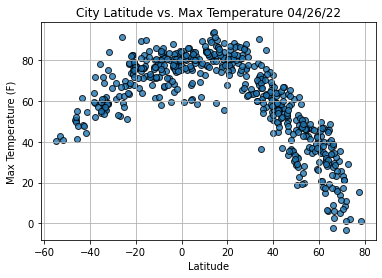

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps, 
           edgecolor = "k",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

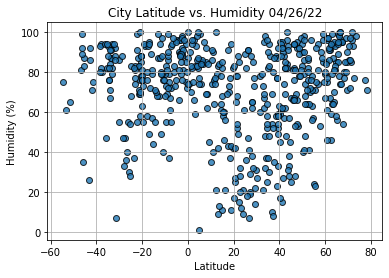

In [14]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity, 
           edgecolor = "k",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

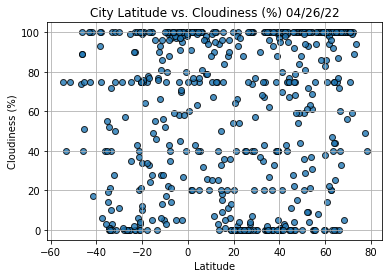

In [17]:
# Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness, 
           edgecolor = "k",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

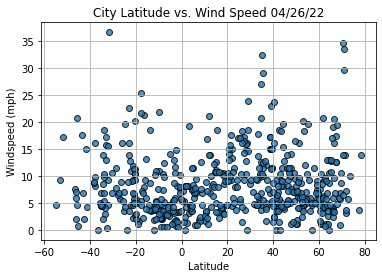

In [19]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed, 
           edgecolor = "k",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()